<img src="escuela-de-economia.png" width="260" height="60">
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Profesor:  Randall Romero Aguilar, PhD</b>
<br><br>
<b>Laboratorio:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Tema 7: Análisis de series estacionales</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Analizando la estacionalidad del número de pasajeros del aeropuerto Juan Santamaría</div> 
</center>
<i>Creado:     2020-Ene-16 
    <br>
    Actualizado: 2020-Oct-26</i>

# Importando y limpiando los datos

Los datos fueron obtenidos de la [ARESEP](https://aresep.go.cr/transparencia/datos-abiertos/pasajeros-movilizados-aeropuerto-internacional)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.x13 import x13_arima_select_order, x13_arima_analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX

x13path = "."

In [3]:
meses = ['Enero', 'Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Setiembre','Octubre', 'Noviembre','Diciembre']
mesescorto = [x[:3] for x in meses]
meses2 = {mes: i for i, mes in enumerate(meses, start=1)}

In [4]:
FILENAME = "Datos-ARESEP-Pasajeros-por-aeropuerto.csv"
SJO = pd.read_csv(FILENAME)

In [5]:
SJO.query('Aeropuerto =="Aeropuerto Internacional Juan Santamaría"', inplace=True)
SJO

,Aeropuerto,Mes,Año,Cantidad Nacionales,Cantidad Extrajeros,Cantidad En Tránsito,Cantidad Exentos,Total Pasajeros
0,Aeropuerto Internacional Juan Santamaría,Diciembre,2019,98254,153319,1420,0,252993
1,Aeropuerto Internacional Juan Santamaría,Noviembre,2019,69338,122130,600,0,192068
2,Aeropuerto Internacional Juan Santamaría,Octubre,2019,69836,102038,531,0,172405
3,Aeropuerto Internacional Juan Santamaría,Setiembre,2019,72172,101211,456,0,173839
4,Aeropuerto Internacional Juan Santamaría,Agosto,2019,57089,156401,370,0,213860
...,...,...,...,...,...,...,...,...
103,Aeropuerto Internacional Juan Santamaría,Mayo,2011,30666,82713,2223,0,115602
104,Aeropuerto Internacional Juan Santamaría,Abril,2011,35224,103098,2221,0,140543
105,Aeropuerto Internacional Juan Santamaría,Marzo,2011,26900,128936,2794,0,158630
106,Aeropuerto Internacional Juan Santamaría,Febrero,2011,24621,105360,1888,0,131869


In [6]:
SJO.replace(meses2, None,inplace=True)
SJO

,Aeropuerto,Mes,Año,Cantidad Nacionales,Cantidad Extrajeros,Cantidad En Tránsito,Cantidad Exentos,Total Pasajeros
0,Aeropuerto Internacional Juan Santamaría,12,2019,98254,153319,1420,0,252993
1,Aeropuerto Internacional Juan Santamaría,11,2019,69338,122130,600,0,192068
2,Aeropuerto Internacional Juan Santamaría,10,2019,69836,102038,531,0,172405
3,Aeropuerto Internacional Juan Santamaría,9,2019,72172,101211,456,0,173839
4,Aeropuerto Internacional Juan Santamaría,8,2019,57089,156401,370,0,213860
...,...,...,...,...,...,...,...,...
103,Aeropuerto Internacional Juan Santamaría,5,2011,30666,82713,2223,0,115602
104,Aeropuerto Internacional Juan Santamaría,4,2011,35224,103098,2221,0,140543
105,Aeropuerto Internacional Juan Santamaría,3,2011,26900,128936,2794,0,158630
106,Aeropuerto Internacional Juan Santamaría,2,2011,24621,105360,1888,0,131869


In [7]:
SJO.sort_values(['Año','Mes'], inplace=True)
SJO

,Aeropuerto,Mes,Año,Cantidad Nacionales,Cantidad Extrajeros,Cantidad En Tránsito,Cantidad Exentos,Total Pasajeros
107,Aeropuerto Internacional Juan Santamaría,1,2011,39797,116312,1920,0,158029
106,Aeropuerto Internacional Juan Santamaría,2,2011,24621,105360,1888,0,131869
105,Aeropuerto Internacional Juan Santamaría,3,2011,26900,128936,2794,0,158630
104,Aeropuerto Internacional Juan Santamaría,4,2011,35224,103098,2221,0,140543
103,Aeropuerto Internacional Juan Santamaría,5,2011,30666,82713,2223,0,115602
...,...,...,...,...,...,...,...,...
4,Aeropuerto Internacional Juan Santamaría,8,2019,57089,156401,370,0,213860
3,Aeropuerto Internacional Juan Santamaría,9,2019,72172,101211,456,0,173839
2,Aeropuerto Internacional Juan Santamaría,10,2019,69836,102038,531,0,172405
1,Aeropuerto Internacional Juan Santamaría,11,2019,69338,122130,600,0,192068


In [8]:
SJO.index = pd.period_range(start=f"{SJO['Año'].iloc[0]}-{SJO['Mes'].iloc[0]}", periods=SJO.shape[0], freq='M')
SJO

,Aeropuerto,Mes,Año,Cantidad Nacionales,Cantidad Extrajeros,Cantidad En Tránsito,Cantidad Exentos,Total Pasajeros
2011-01,Aeropuerto Internacional Juan Santamaría,1,2011,39797,116312,1920,0,158029
2011-02,Aeropuerto Internacional Juan Santamaría,2,2011,24621,105360,1888,0,131869
2011-03,Aeropuerto Internacional Juan Santamaría,3,2011,26900,128936,2794,0,158630
2011-04,Aeropuerto Internacional Juan Santamaría,4,2011,35224,103098,2221,0,140543
2011-05,Aeropuerto Internacional Juan Santamaría,5,2011,30666,82713,2223,0,115602
...,...,...,...,...,...,...,...,...
2019-08,Aeropuerto Internacional Juan Santamaría,8,2019,57089,156401,370,0,213860
2019-09,Aeropuerto Internacional Juan Santamaría,9,2019,72172,101211,456,0,173839
2019-10,Aeropuerto Internacional Juan Santamaría,10,2019,69836,102038,531,0,172405
2019-11,Aeropuerto Internacional Juan Santamaría,11,2019,69338,122130,600,0,192068


In [9]:
SJO.drop(['Aeropuerto', 'Mes', 'Año', 'Cantidad En Tránsito', 'Cantidad Exentos','Total Pasajeros'], axis=1,inplace=True)
SJO.rename(columns={'Cantidad Nacionales':'nacionales', 'Cantidad Extrajeros':'extranjeros'}, inplace=True)
SJO                    

,nacionales,extranjeros
2011-01,39797,116312
2011-02,24621,105360
2011-03,26900,128936
2011-04,35224,103098
2011-05,30666,82713
...,...,...
2019-08,57089,156401
2019-09,72172,101211
2019-10,69836,102038
2019-11,69338,122130


# Gráficos de estacionalidad

## Serie de tiempo original contra el tiempo

[Text(0, 0.5, 'miles de pasajeros'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Cantidad de pasajeros del aeropuerto Juan Santamaría, por mes y residencia')]

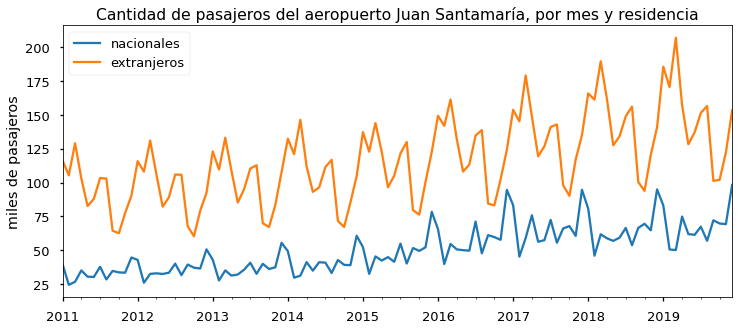

In [10]:
sjodatos = SJO/1000

fig, ax = plt.subplots(figsize=[12,5])
sjodatos.plot(ax=ax)
ax.set(xlabel='', ylabel='miles de pasajeros', title='Cantidad de pasajeros del aeropuerto Juan Santamaría, por mes y residencia')
#fig.savefig('SJO-pasajeros.pdf', bbox_inches='tight')

## Cada mes en su propio gráfico

In [11]:
sjodatos.index = pd.MultiIndex.from_arrays([sjodatos.index.year, sjodatos.index.month])
sjodatos

nacionales  extranjeros
2011 1       39.797      116.312
     2       24.621      105.360
     3       26.900      128.936
     4       35.224      103.098
     5       30.666       82.713
...             ...          ...
2019 8       57.089      156.401
     9       72.172      101.211
     10      69.836      102.038
     11      69.338      122.130
     12      98.254      153.319

[108 rows x 2 columns]

In [12]:
sjodatoscuadro = sjodatos.unstack()
sjodatoscuadro

nacionales                                                          \
             1       2       3       4       5       6       7       8    
2011     39.797  24.621  26.900  35.224  30.666  30.401  37.952  28.605   
2012     43.013  26.159  32.688  33.113  32.652  33.565  40.250  31.762   
2013     43.173  27.828  35.259  31.420  32.242  35.732  40.899  32.744   
2014     49.453  29.900  31.389  41.355  35.077  41.290  40.989  33.387   
2015     52.436  32.709  45.565  42.523  45.060  41.610  55.015  40.342   
2016     65.559  39.922  54.733  50.743  50.182  49.813  71.237  47.848   
2017     83.350  45.407  59.057  75.897  56.384  57.548  72.454  55.641   
2018     80.747  46.119  61.855  58.915  57.026  59.374  66.564  53.858   
2019     83.142  50.683  50.288  74.966  62.038  61.487  67.462  57.089   

                      ... extranjeros                                      \
          9       10  ...          3        4        5        6        7    
2011  34.890  33.800  ...     128.936  103.098   82.713   87.984  103.344   
2012  39.582  37.254  ...     130.949  106.010   82.235   89.148  105.916   
2013  40.120  36.303  ...     133.010  108.496   85.302   94.980  110.324   
2014  42.932  39.352  ...     146.267  111.881   93.133   96.394  111.423   
2015  51.761  49.628  ...     143.845  122.819   96.530  105.053  121.514   
2016  61.263  59.788  ...     161.254  131.984  108.096  113.257  134.607   
2017  66.218  67.918  ...     178.954  148.746  119.364  126.756  141.006   
2018  66.628  69.615  ...     189.397  161.284  127.450  134.066  148.868   
2019  72.172  69.836  ...     206.724  157.030  128.220  136.965  151.372   

                                                   
           8        9        10       11       12  
2011  102.893   64.575   62.624   77.548   90.298  
2012  105.745   67.775   60.425   79.305   92.365  
2013  112.790   69.996   67.254   83.521  107.738  
2014  116.790   71.728   67.279   85.296  104.898  
2015  129.884   79.581   76.395  100.505  122.606  
2016  138.666   84.513   83.165  102.438  124.247  
2017  142.777   97.889   90.238  117.062  134.992  
2018  155.950  100.333   93.870  120.440  140.736  
2019  156.401  101.211  102.038  122.130  153.319  

[9 rows x 24 columns]

In [13]:
sjodatoscuadro['nacionales']

,1,2,3,4,5,6,7,8,9,10,11,12
2011,39.797,24.621,26.900,35.224,30.666,30.401,37.952,28.605,34.890,33.800,33.581,44.776
2012,43.013,26.159,32.688,33.113,32.652,33.565,40.250,31.762,39.582,37.254,36.664,50.781
2013,43.173,27.828,35.259,31.420,32.242,35.732,40.899,32.744,40.120,36.303,37.553,55.599
2014,49.453,29.900,31.389,41.355,35.077,41.290,40.989,33.387,42.932,39.352,39.118,60.798
2015,52.436,32.709,45.565,42.523,45.060,41.610,55.015,40.342,51.761,49.628,52.292,78.466
2016,65.559,39.922,54.733,50.743,50.182,49.813,71.237,47.848,61.263,59.788,57.809,94.613
2017,83.350,45.407,59.057,75.897,56.384,57.548,72.454,55.641,66.218,67.918,60.708,94.701
2018,80.747,46.119,61.855,58.915,57.026,59.374,66.564,53.858,66.628,69.615,64.815,94.955
2019,83.142,50.683,50.288,74.966,62.038,61.487,67.462,57.089,72.172,69.836,69.338,98.254


In [14]:
promediomensual = sjodatoscuadro.mean().unstack().T

In [15]:
promediomensual

,nacionales,extranjeros
1,60.074444,142.041333
2,35.927556,131.679778
3,44.192667,157.704000
4,49.350667,127.927556
5,44.591889,102.560333
6,45.646667,109.400333
7,54.758000,125.374889
8,42.364000,129.099556
9,52.840667,81.955667
10,51.499333,78.143111


Text(0.5, 0.98, 'Miles de pasajeros del aeropuerto Juan Santamaría, por mes y residencia')

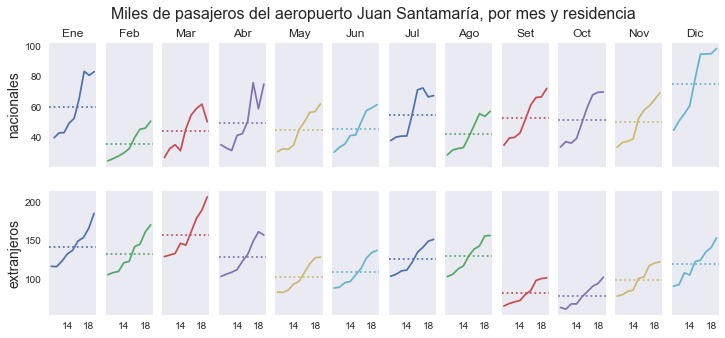

In [16]:
plt.style.use('seaborn')
fig, axs= plt.subplots(2,12, figsize=[12,5], sharex=True, sharey='row')

sjodatoscuadro['nacionales'].plot(subplots=True, ax=axs[0],legend=False);
for ax, (mes, mean) in zip(axs[0], promediomensual['nacionales'].iteritems()):
    ax.set_title(mesescorto[mes-1])
    color = ax.lines[0].get_color()
    ax.axhline(mean, color=color, ls=':')
    ax.grid(False)
    

sjodatoscuadro['extranjeros'].plot(subplots=True, ax=axs[1],legend=False);
for ax, (mes, mean) in zip(axs[1], promediomensual['extranjeros'].iteritems()):
    color = ax.lines[0].get_color()
    ax.axhline(mean, color=color, ls=':')
    ax.grid(False)    
    ax.set_xlabel('')
    
axs[0,0].set_xticks([2010,2014,2018])
axs[0,0].set_xticklabels(['10','14','18'])


axs[0,0].set_ylabel('nacionales', size=14)
axs[1,0].set_ylabel('extranjeros', size=14)

fig.suptitle('Miles de pasajeros del aeropuerto Juan Santamaría, por mes y residencia', size=16)
#fig.savefig('SJO-pasajeros-por-mes.pdf', bbox_inches='tight')

## Cada año como serie individual, meses en el eje horizontal

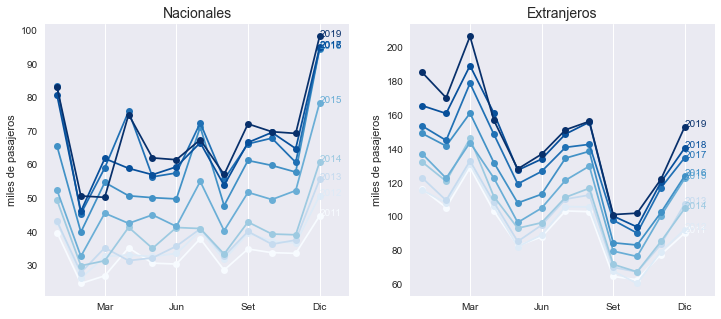

In [17]:
fig, axs= plt.subplots(1,2, figsize=[12,5], sharex=True)

sjodatoscuadro['nacionales'].T.plot(ax=axs[0], cmap = 'Blues', marker='o', legend=False);
sjodatoscuadro['extranjeros'].T.plot(ax=axs[1], cmap = 'Blues', marker='o', legend=False);


for ax,tlt in zip(axs, ['Nacionales', 'Extranjeros']):
    ax.set(xlabel='', 
           xticks=[3,6,9,12], 
           xticklabels = mesescorto[2::3], 
           xlim=[0.5,13.25],
           ylabel='miles de pasajeros')
    ax.grid(False, axis='y')
    ax.set_title(tlt, size=14)
    colores = [aa.get_color() for aa in ax.lines]
    for (a,v), cc in zip(sjodatoscuadro[tlt.lower()].T.loc[12].iteritems(), colores):
        ax.annotate(str(a), [12, v], color=cc)
        
#fig.savefig('SJO-pasajeros-por-mes2.pdf', bbox_inches='tight')        

# Estudiando la autocorrelación

In [18]:
def correlogramas4(serie, residencia, func):
    fig, axs= plt.subplots(2,2, figsize=[12,5], sharex=True, sharey=True)
    opts = dict(lags=24)
    if func is plot_pacf:
        opts['method'] = 'ols'
    
    func(serie, **opts,ax=axs[0,0], title='$y_t$');
    func(serie.diff(1).dropna(), **opts, ax=axs[0,1],title='$\Delta y_t$');
    func(serie.diff(12).dropna(), **opts, ax=axs[1,0],title='$\Delta_{12}y_t$');
    func(serie.diff(1).diff(12).dropna(), **opts, ax=axs[1,1],title='$\Delta\Delta_{12}y_t$');
    
    for ax in axs.flat:
        ax.set(xlim=[-0.5,24.5], xticks=np.arange(0,25,6))
    
    pp = 'parcial' if (func is plot_pacf) else ''
    fig.suptitle(f'Correlogramas {pp} de cantidad de pasajeros {residencia} en SJO', size=18)
    return fig

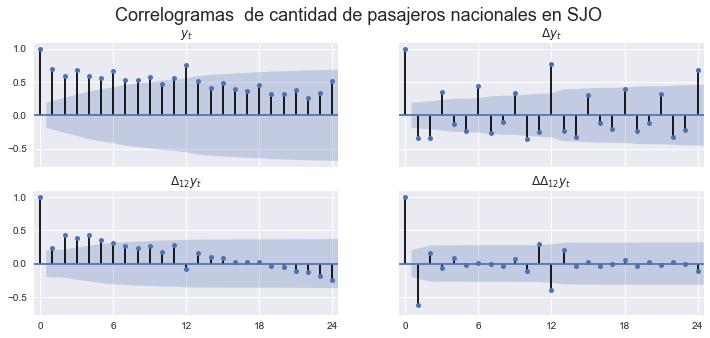

In [19]:
nacionales = pd.DataFrame(np.log(sjodatos['nacionales'].values), index=pd.period_range('2011-01', '2019-12', freq='M'))
correlogramas4(nacionales, 'nacionales', plot_acf);

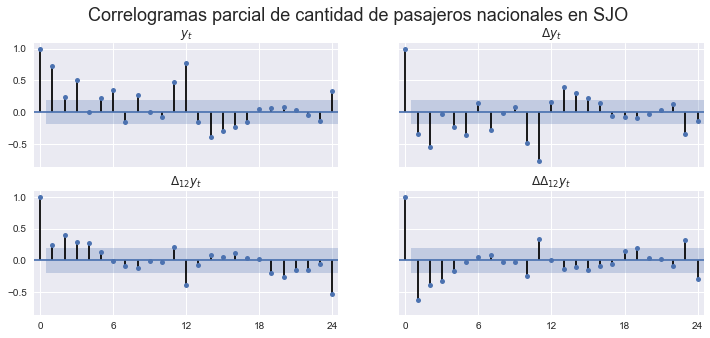

In [20]:
correlogramas4(nacionales, 'nacionales', plot_pacf);

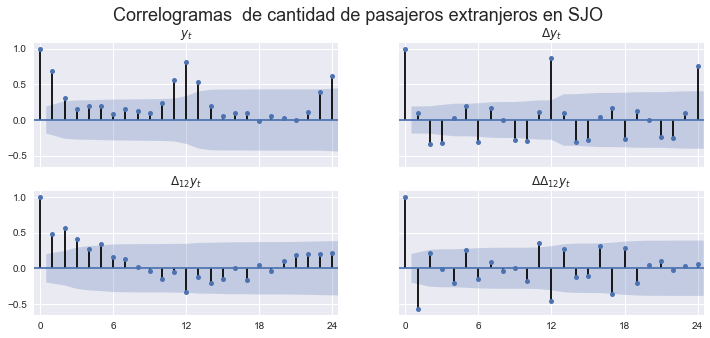

In [21]:
extranjeros = pd.DataFrame(np.log(sjodatos['extranjeros'].values), index=pd.period_range('2011-01', '2019-12', freq='M'))
fig = correlogramas4(extranjeros, 'extranjeros', plot_acf);
#fig.savefig('sjo-ACF-extranjeros.pdf', bbox_inches='tight')

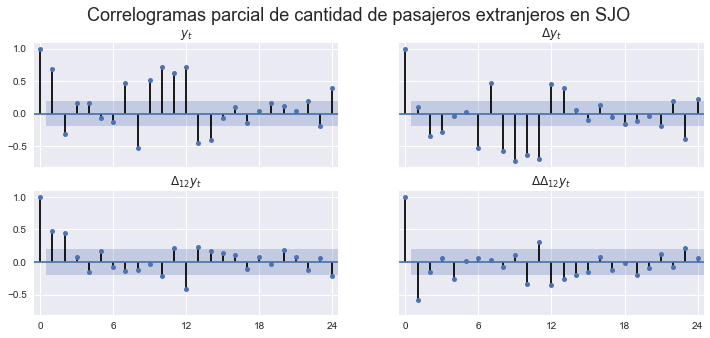

In [22]:
correlogramas4(extranjeros, 'extranjeros', plot_pacf);

# Estimación de un modelo SARIMA

## Selección de orden usando X13

### Pasajeros nacionales

In [23]:
resultado = x13_arima_select_order(nacionales, x12path=x13path, log=False)
print(f"Modelo escogido: SARIMA{resultado['order']}X{resultado['sorder']}")

Modelo escogido: SARIMA(0, 1, 2)X(0, 1, 1)


### Pasajeros extranjeros

In [24]:
resultado = x13_arima_select_order(extranjeros, x12path=x13path, log=False)
print(f"Modelo escogido: SARIMA{resultado['order']}X{resultado['sorder']}")

Modelo escogido: SARIMA(0, 1, 1)X(0, 1, 1)


## Estimación del modelo

### Pasajeros nacionales

In [25]:
mod_nacionales = SARIMAX(nacionales, order=(0,1,2), seasonal_order=(0,1,1,12)).fit()
mod_nacionales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    0   No. Observations:                  108
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 110.232
Date:                              Mon, 26 Oct 2020   AIC                           -212.464
Time:                                      10:29:31   BIC                           -202.249
Sample:                                  01-31-2011   HQIC                          -208.336
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0126      0.102     -9.967      0.000      -1.212      -0.813
ma.L2          0.3370      0.099      3.405      0.001       0.143       0.531
ma.S.L12      -0.9032      0.334     -2.701      0.007      -1.559      -0.248
sigma2         0.0047      0.001      3.415      0.001       0.002       0.007
===================================================================================
Ljung-Box (Q):                       25.13   Jarque-Bera (JB):                 3.29
Prob(Q):                              0.97   Prob(JB):                         0.19
Heteroskedasticity (H):               1.32   Skew:                            -0.17
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Pasajeros extranjeros

In [26]:
mod_extranjeros = SARIMAX(extranjeros, order=(0,1,1), seasonal_order=(0,1,1,12)).fit()

with open('SJO-extranjeros-SARIMA.tex','w') as archivo:
    archivo.write(mod_extranjeros.summary().as_latex())
    
mod_extranjeros.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  0   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 194.101
Date:                            Mon, 26 Oct 2020   AIC                           -382.202
Time:                                    10:29:31   BIC                           -374.540
Sample:                                01-31-2011   HQIC                          -379.106
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6109      0.087     -7.026      0.000      -0.781      -0.440
ma.S.L12      -0.7647      0.117     -6.522      0.000      -0.994      -0.535
sigma2         0.0009      0.000      6.346      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       47.51   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.19   Prob(JB):                         0.89
Heteroskedasticity (H):               1.56   Skew:                             0.09
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Pronósticos

In [27]:
def plot_forecast(modelo, serie, residencia, ax):
    fcast = modelo.get_forecast('2020-12')
    ci = np.exp(fcast.conf_int())
    np.exp(fcast.predicted_mean).plot(ax=ax)
    ax.fill_between(ci.index,'lower y', 'upper y', data=ci, alpha=0.5)    
    np.exp(serie).plot(ax=ax, legend=False)
    ax.set(title=f'Pronóstico de pasajeros {residencia} en aeropuerto SJO')
    return ax

[Text(0, 0.5, 'miles de pasajeros')]

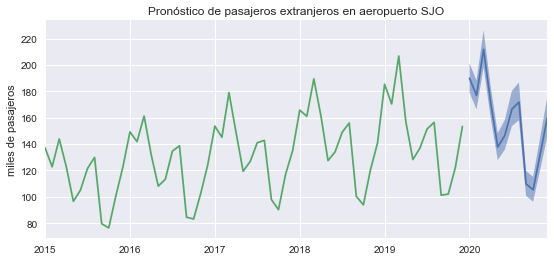

In [28]:
fig, ax = plt.subplots(1,1, figsize=[9,4])
plot_forecast(mod_extranjeros, extranjeros['2015':], 'extranjeros', ax)
ax.set(ylabel='miles de pasajeros')
#fig.savefig('SJO-sarima-extranjeros-forecast.pdf', bbox_inches='tight')

# Descomposición de una serie usando X13

In [29]:
def X13ARIMA(serie, show=False):
    
    res = x13_arima_analysis(serie, x12path=x13path, log=False)
    if show:
        print(res.results)
    temp = pd.concat([res.__getattribute__(componente) for componente in ['observed','seasadj','trend','irregular']], axis=1)
    temp.columns = ['Serie original','Serie ajustada por estacionalidad','Serie tendencia ciclo','Componente irregular']
    return temp

In [30]:
componentes = X13ARIMA(extranjeros, False)

In [31]:
componentes

,Serie original,Serie ajustada por estacionalidad,Serie tendencia ciclo,Componente irregular
2011-01,4.756276,4.509644,4.508827,0.000818
2011-02,4.657383,4.506701,4.511938,-0.005237
2011-03,4.859316,4.516875,4.514741,0.002133
2011-04,4.635680,4.511089,4.517518,-0.006429
2011-05,4.415377,4.530892,4.519544,0.011348
...,...,...,...,...
2019-08,5.052423,4.948874,4.958813,-0.009940
2019-09,4.617207,4.967796,4.968416,-0.000620
2019-10,4.625345,5.022682,4.980319,0.042363
2019-11,4.805086,4.972898,4.992189,-0.019291


Text(0.5, 0.98, 'Descomposición multiplicativa de la serie de pasajeros extranjeros en SJO, X13as')

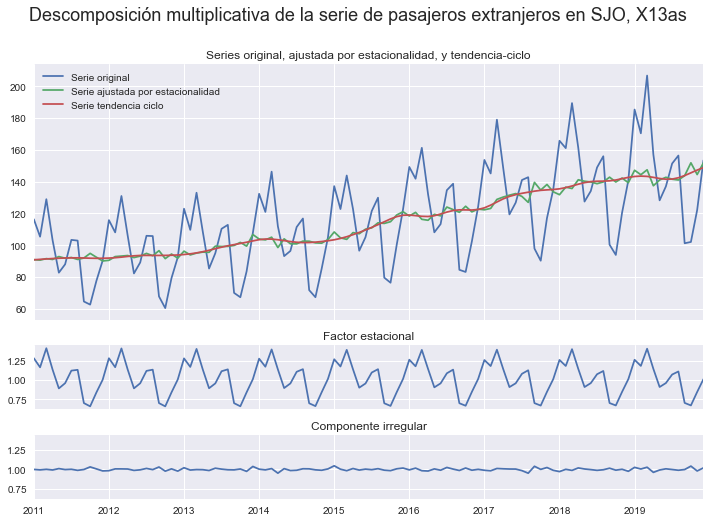

In [32]:
fig = plt.figure(figsize=[12,8])
gs = plt.GridSpec(3,1,figure=fig, height_ratios=[4,1,1])
ax0 = fig.add_subplot(gs[0])
np.exp(componentes.iloc[:,:3]).plot(ax=ax0)

ax1 = fig.add_subplot(gs[1],sharex=ax0)
sfact = componentes['Serie original'] - componentes['Serie ajustada por estacionalidad']
np.exp(sfact).plot(ax=ax1)


ax2 = fig.add_subplot(gs[2],sharex=ax0, sharey=ax1)
np.exp(componentes['Componente irregular']).plot(ax=ax2)

ax0.set(title='Series original, ajustada por estacionalidad, y tendencia-ciclo')
ax1.set(title='Factor estacional')
ax2.set(title='Componente irregular')
fig.suptitle('Descomposición multiplicativa de la serie de pasajeros extranjeros en SJO, X13as', size=18)

#fig.savefig('SJO-extranjeros-descomposición.pdf', bbox_inches='tight')

## Graficando los factores

[Text(0.5, 1.0, 'Factores estacionales de 2019')]

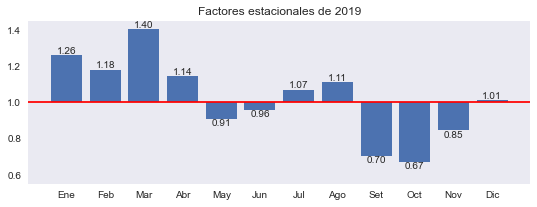

In [33]:
factores2019 = np.exp(sfact['2019':'2019'])
etiq = [f'{ff:.2f}' for ff in factores2019]
fig, ax = plt.subplots(figsize=[9,3])

ax.bar(mesescorto, factores2019-1)
ax.set(yticks=np.array([0.6,0.8,1.0,1.2,1.4])-1, 
       yticklabels = ['0.6','0.8','1.0','1.2','1.4'], 
       ylim=[-0.45,0.45])

ax.grid(False)
ax.axhline(0, color='red')

for mes, ff, tx in zip(range(12), factores2019.values, etiq):
    offs = -1.025 if ff<1 else -0.975
    ax.annotate(tx, (mes,ff+offs),ha='center', va='center')

ax.set(title='Factores estacionales de 2019')
#fig.savefig('SJO-extranjeros-seasonal-factor.pdf', bbox_inches='tight')

In [34]:
factores2019

2019-01    1.259537
2019-02    1.180528
2019-03    1.402092
2019-04    1.142952
2019-05    0.909268
2019-06    0.959711
2019-07    1.069695
2019-08    1.109101
2019-09    0.704274
2019-10    0.672108
2019-11    0.845513
2019-12    1.009938
Freq: M, dtype: float64

# Comparando la tasa de crecimiento obtenida a partir de series ajustadas

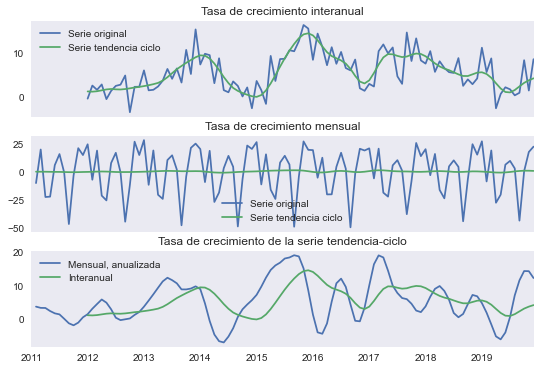

In [35]:
fig, axs = plt.subplots(3,1,figsize=[9,6], sharex=True)

(100 * componentes[['Serie original','Serie tendencia ciclo']].diff(12)).plot(ax=axs[0])

(100 * componentes[['Serie original','Serie tendencia ciclo']].diff()).plot(ax=axs[1])

(100*((componentes[['Serie tendencia ciclo']].diff())*12)).plot(ax=axs[2])
(100 * componentes[['Serie tendencia ciclo']].diff(12)).plot(ax=axs[2])


axs[0].set(title='Tasa de crecimiento interanual')
axs[1].set(title='Tasa de crecimiento mensual')
axs[2].set(title='Tasa de crecimiento de la serie tendencia-ciclo')
axs[2].legend(['Mensual, anualizada', 'Interanual'])

for ax in axs:
    ax.grid(False)
    
#fig.savefig('SJO-extranjeros-tasa-crecimiento.pdf', bbox_inches='tight')    